- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
with open('tom_1.txt', 'r') as f:
    text = f.read().lower()
text = re.sub(r'[^а-яё]',r' ', text) 

Очистил 1 том книги, оставив только русские буквы и символы пробела.

In [3]:
# text

In [4]:
Rus = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(Rus)}

In [5]:
POS

{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ё': 6,
 'ж': 7,
 'з': 8,
 'и': 9,
 'й': 10,
 'к': 11,
 'л': 12,
 'м': 13,
 'н': 14,
 'о': 15,
 'п': 16,
 'р': 17,
 'с': 18,
 'т': 19,
 'у': 20,
 'ф': 21,
 'х': 22,
 'ц': 23,
 'ч': 24,
 'ш': 25,
 'щ': 26,
 'ъ': 27,
 'ы': 28,
 'ь': 29,
 'э': 30,
 'ю': 31,
 'я': 32}

In [6]:
probabilities = np.zeros((len(Rus), len(Rus)))

In [7]:
for cp, cn in zip(text[:-1], text[1:]):
    try:
        probabilities[POS[cp], POS[cn]] += 1
    except:
        continue

In [8]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [9]:
df = pd.DataFrame(probabilities, index=(c for c in Rus), columns=(c for c in Rus))

Матрица переходных вероятностей.

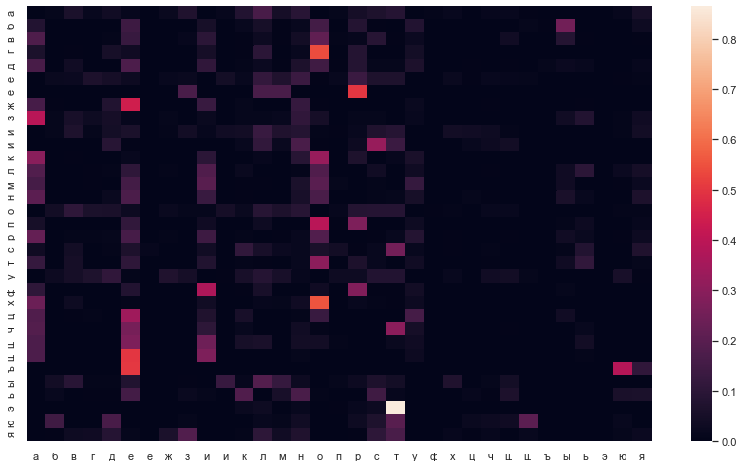

In [10]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р.

In [11]:
start = POS['п']
end = POS['р']
prior = 1. / len(Rus)
for c1 in Rus:
    for c2 in Rus:  
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
    if proba > 0:
        print(''.join(['п', c1, c2, 'р']), proba)

паяр 3.900736684440901e-07
пеяр 1.1580886397619033e-07
пияр 2.0176653162441178e-07
пляр 2.2881827670146989e-07
пняр 2.2385590058669784e-08
пояр 4.6351259741920894e-07
ппяр 8.573448311700677e-09
пряр 1.1064487012609644e-06
псяр 1.519327825327205e-09
птяр 3.5873675241368894e-09
пуяр 1.701928922201605e-08
пьяр 2.428828089744024e-07
пяяр 5.546019943863967e-08


Сгенерировал слово, начинающееся с буквы "б" и имеющее длину 8-мь символов.

In [12]:
s = []
start = 'б'
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(Rus), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

быляваст


In [13]:
!pip install hmmlearn

Построение ряда weekly-closings-of-the-dowjones через HMM.

In [14]:
from hmmlearn.hmm import GaussianHMM

In [15]:
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']

In [16]:
values = dowjones_closing.values.reshape(-1,1)
# values 

In [17]:
for n in range(1, 10):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582104
2 -820.6341453620576
3 -786.837533266772
4 -752.0201472668986
5 -737.1181370073002
6 -729.5671112589432
7 -713.723399171699
8 -702.1057754508203
9 -690.9833067284742


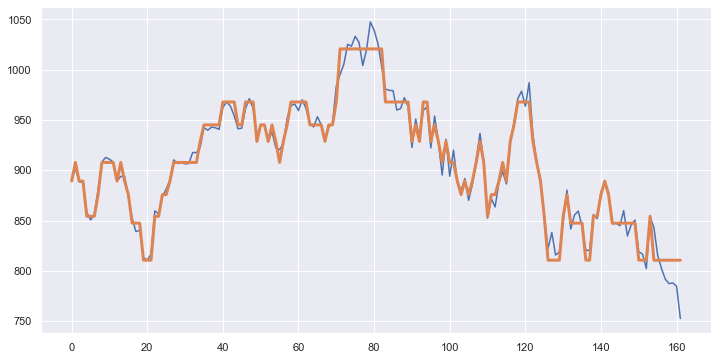

In [18]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)